In [1]:
import torch
from torch import nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


## Make Classification Data

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=36)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[-0.51616097 -0.80448756]
 [ 0.21437768 -0.7292871 ]
 [ 0.52268172 -0.61083988]
 [-0.92241222  0.44613843]
 [-0.25736324 -0.70654505]]
First 5 samples of y:
 [0 1 1 0 1]


In [5]:
# Make DataFrame of circle data
circles = pd.DataFrame({
    "X_1": X[:, 0],
    "X_2": X[:, 1],
    "label": y
})
circles.head(10)

,X_1,X_2,label
0,-0.516161,-0.804488,0
1,0.214378,-0.729287,1
2,0.522682,-0.610840,1
3,-0.922412,0.446138,0
4,-0.257363,-0.706545,1
5,0.078599,-0.755956,1
6,-0.065401,-0.975706,0
7,-0.502730,0.653031,1
8,-0.794530,-0.102092,1
9,-0.152934,-1.025184,0


In [6]:
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

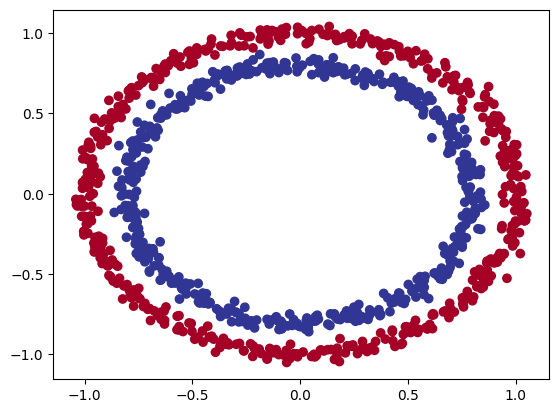

In [7]:
# Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[-0.51616097, -0.80448756],
       [ 0.21437768, -0.7292871 ],
       [ 0.52268172, -0.61083988],
       ...,
       [ 0.47193053, -0.66317014],
       [ 0.12211491,  0.80297944],
       [-0.20310922,  0.76032911]])

In [10]:
# View the first sample of features & labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.51616097 -0.80448756] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


### Tensors

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.5162, -0.8045],
         [ 0.2144, -0.7293],
         [ 0.5227, -0.6108],
         [-0.9224,  0.4461],
         [-0.2574, -0.7065]]),
 tensor([0., 1., 1., 0., 1.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Train & Test Splits

In [14]:
# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=36)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [16]:
n_samples

1000

## Build the Model

In [17]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train

tensor([[ 0.2652, -0.9949],
        [ 0.7793, -0.1630],
        [-0.6993, -0.7144],
        ...,
        [-1.0087,  0.2179],
        [ 0.7199,  0.7370],
        [ 0.9776,  0.1132]])

In [19]:
X_train.shape

torch.Size([800, 2])

In [20]:
y_train[:5]

tensor([0., 1., 0., 1., 1.])

In [21]:
# [1] Construct a model that subclasses `nn.module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # [2] Create 2 `nn.Linear` layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # [3] Define a `forward()` method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# [4] Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters()).device

device(type='cpu')

In [24]:
# Replicate the model using `nn.Sequential()`
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2652,  0.0685],
                      [ 0.6354, -0.2154],
                      [ 0.2009, -0.0962],
                      [ 0.0981, -0.5029],
                      [ 0.6384,  0.0247]])),
             ('0.bias', tensor([ 0.4934,  0.1146, -0.0324,  0.6758,  0.6049])),
             ('1.weight',
              tensor([[-0.1936, -0.3549,  0.4179, -0.3692,  0.3517]])),
             ('1.bias', tensor([0.3971]))])

In [26]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.])


In [27]:
X_test[:10], y_test[:10]

(tensor([[-0.7519, -0.2348],
         [ 0.0672, -1.0155],
         [ 0.8382, -0.0326],
         [ 0.9453, -0.3723],
         [ 0.0867,  1.0243],
         [-0.7047, -0.4041],
         [ 0.8015,  0.1478],
         [-0.9936,  0.2249],
         [ 0.1271,  0.7600],
         [-0.6808, -0.3660]]),
 tensor([1., 0., 1., 0., 0., 1., 1., 0., 1., 1.]))